TWEETER SENTIMENT

1. BUSINESS UNDERSTANDING
   
   OVERVIEW

Chemami Ent. is a platform that focuses on analyzing customer feedbacks on products by various brands. this gives an opportunity to brands to learn what makes customers happy or un unhappy about their products, so that they can tailor products to meet their customers' needs.
Apple offers a diverse range of products, including hardware devices, software and services that are diverse.Their products range from the iconic iPhone and Mac computers to wearables like the Apple watch and a suite of services that are convinient. This has made Apple company to be a global technology leder, synonymous with innovation, design, excellence and pushing boundaries in the world of consumer electronics.

In [1]:
!pip install nltk
# import important modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv(r'c:\Users\Margaret Mitey\OneDrive\Documents\judge_1377884607_tweet_product_company.csv')

In [3]:
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [4]:
df.shape

(8721, 3)

In [5]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [8]:
#Renaming the columns
df = df.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
df.head()

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [15]:
#Simplify sentiment labels 
dict_sent = {'No emotion toward brand or product':"No emotion", 
             'Positive emotion':'Positive emotion',
             'Negative emotion':'Negative emotion',
             "I can't tell": "I can't tell"}
df['Sentiment'] = df['Sentiment'].map(dict_sent)

In [16]:
df["Sentiment"].value_counts()

No emotion          5156
Positive emotion    2869
Negative emotion     545
I can't tell         151
Name: Sentiment, dtype: int64

In [17]:
# check missing values in data
df.isnull().sum()

Tweet           1
Product      5552
Sentiment       0
dtype: int64

In [18]:
# Print the value count of product and sentiment column
print(df['Product'].value_counts())
print(("-"*40))
print(df['Sentiment'].value_counts())

iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: Product, dtype: int64
----------------------------------------
No emotion          5156
Positive emotion    2869
Negative emotion     545
I can't tell         151
Name: Sentiment, dtype: int64


In [19]:
# Check for duplicated rows
print('Total duplicated rows')
print(df.duplicated().sum())
print(("-"*40))

# Check for null values
print('Total null values')
print(df.isna().sum())

Total duplicated rows
22
----------------------------------------
Total null values
Tweet           1
Product      5552
Sentiment       0
dtype: int64


In [20]:
#Dropping duplicates
df.drop_duplicates(inplace=True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion
8718,"Google's Zeiger, a physician never reported po...",NaN,No emotion
8719,Some Verizon iPhone customers complained their...,NaN,No emotion


In [21]:
#Fills NaN's with "Undefined" to help with data visualizations
df['Product'].fillna("Undefined", inplace = True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your re...",Undefined,No emotion
8718,"Google's Zeiger, a physician never reported po...",Undefined,No emotion
8719,Some Verizon iPhone customers complained their...,Undefined,No emotion


In [29]:
#To classify every tweet to either Apple or Google products 
df["Product"].fillna("none", inplace = True)
df_none = df.loc[df["Product"] == 'none']

apple_condition = (df['Product'] == "iPad") | (df['Product'] == "iPad or iPhone App") | (df['Product'] == "iPhone") | (df['Product'] == "Other Apple product or service")
google_condition = (df['Product'] == "Other Google product or service") | (df['Product'] == "Android App") | (df['Product'] == "Android") 
df.loc[apple_condition,'Product'] = "Apple"
df.loc[google_condition, 'Product'] = "Google"

# apple loop
for word in ["Apple","iphone","apple","ipad","ipad2","iPad 2","iPhone","iPad"]:
    temp_df = df_none[df_none['Tweet'].str.contains(word)]
    temp_df['Product'].replace({'none': 'Apple'}, inplace=True)
    df_none = temp_df.combine_first(df_none)
# google loop
for word in ["Google","google","Android","android"]:
    temp_df = df_none[df_none['Tweet'].str.contains(word)]
    temp_df['Product'].replace({'none': 'Google'}, inplace=True)
    df_none = temp_df.combine_first(df_none)
df_1 = df_none.combine_first(df)

In [49]:
df_1 = df_1[df_1['Product'] != "none"]
df_1 = df_1[df_1['Sentiment'] != "I can't tell"]

c:\Users\Margaret Mitey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_12048\1901985256.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,500,1000,1500,2000,2500], fontsize=18)


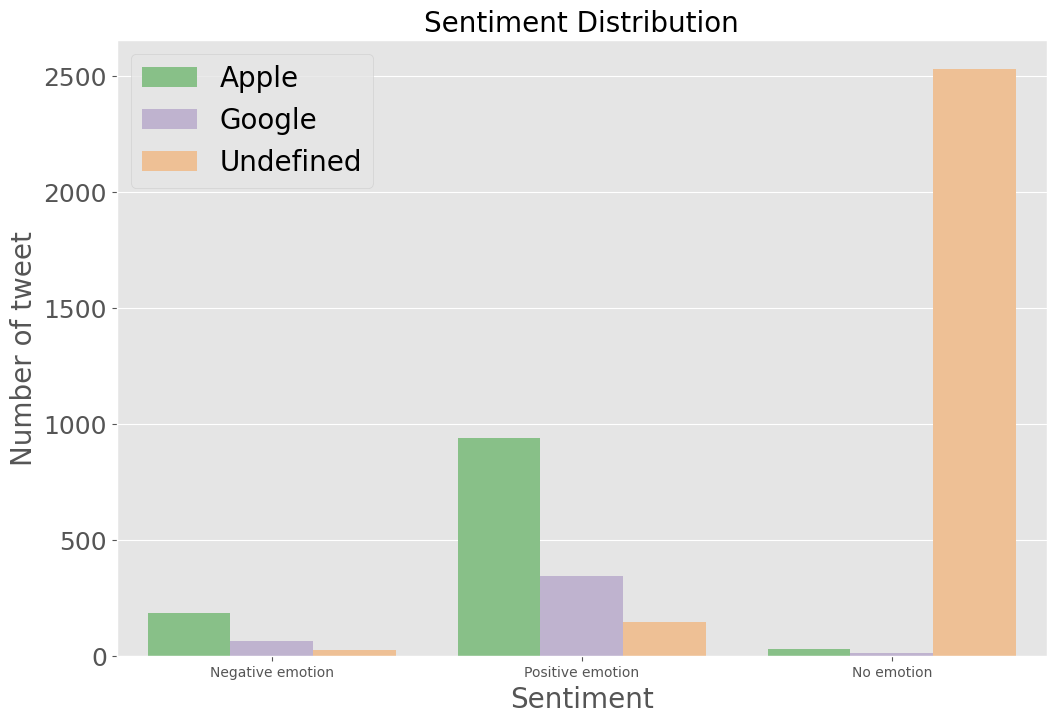

In [50]:
#Visual of sentiment distribution of products
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['Negative_emotion','No_emotion','Positive_emotion', 'I_cant_tell']
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(df_1['Sentiment'], hue=df_1['Product'], palette='Accent')
plt.title('Sentiment Distribution', fontsize=20)
ax.set_yticklabels([0,500,1000,1500,2000,2500], fontsize=18)
plt.xlabel('Sentiment',fontsize=20)
plt.ylabel('Number of tweet',fontsize=20)
plt.legend(loc=2, prop={'size': 20})
plt.show()